## Implementing random forest classifier for Online product reviews - rating classification/prediction. 

In [1]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
!pip install scikit-plot
import scikitplot as skplt
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install stop_words

# NLP modules
import nltk
import re 
import string
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob , Word
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Wordcloud Modules
from wordcloud import WordCloud , STOPWORDS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=f7be9b6b31236ca99871004ace0ee8632e7af44694a768f0dabbd18c72302faf
  Stored in directory: /root/.cache/pip/wheels/eb/03/0d/3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words


In [4]:
color = sns.color_palette()
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)
nltk.download("stopwords")
nltk.download("all")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]   

True

In [5]:
#loading the dataset
reviews_df=pd.read_csv('/content/drive/MyDrive/CMPE_257_Project/amazon_dataset/reviews_data.csv')
reviews_df.head(5)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews.date,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,upc
0,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,8.90E+11
1,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,8.90E+11
2,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-12-04T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,8.90E+11
3,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-12-01T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,8.90E+11
4,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,8.90E+11,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2015-11-28T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,8.90E+11


In [6]:
reviews_df.shape

(78343, 20)

In [7]:
#Columns/attributes and their datatypes
reviews_df.dtypes

id                      object
brand                   object
categories              object
dateAdded               object
dateUpdated             object
ean                     object
keys                    object
manufacturer            object
manufacturerNumber      object
name                    object
reviews.date            object
reviews.dateSeen        object
reviews.doRecommend     object
reviews.numHelpful     float64
reviews.rating         float64
reviews.sourceURLs      object
reviews.text            object
reviews.title           object
reviews.username        object
upc                     object
dtype: object

### Data cleaning and preprocessing

In [8]:
reviews_df.isnull().sum()

id                         0
brand                      0
categories                 0
dateAdded                  0
dateUpdated                0
ean                    36327
keys                       0
manufacturer            2808
manufacturerNumber       203
name                       0
reviews.date             128
reviews.dateSeen           0
reviews.doRecommend    40277
reviews.numHelpful     40022
reviews.rating           164
reviews.sourceURLs         0
reviews.text              41
reviews.title            480
reviews.username          96
upc                        2
dtype: int64

In [9]:
#dropping null values from the important columns used for model training

reviews_df = reviews_df.dropna(subset=['reviews.text']) #dropping null reviews text
reviews_df = reviews_df.dropna(subset=['reviews.title']) #dropping null reviews title
reviews_df = reviews_df.dropna(subset=['reviews.rating']) #dropping null ratings

In [10]:
reviews_df.shape

(77670, 20)

In [11]:
reviews_df.duplicated(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date']).sum()

761

In [12]:
#dropping the duplicated values based on review text, username, rating and date
reviews_df=reviews_df.drop_duplicates(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date'])

In [13]:
reviews_df.shape

(76909, 20)

In [14]:
reviews_df["full_review"] = reviews_df['reviews.title'].astype(str) +" "+ reviews_df["reviews.text"]

In [15]:
# preprocessing the reviews text (converting to lowercase, removing string literals)
reviews_df["full_review"] = (
    reviews_df["full_review"]
    .str.lower()                    
    .str.replace("[^\w\s]", "")
    .str.replace("\d+", "")
    .str.replace("\n", " ")
    .replace("\r", "")
    .str.replace("[^a-zA-Z0-9\s]", "")
)

In [16]:
reviews_df['full_review']

0        love the fingerprint reader this keyboard is v...
1        nice its thin and light i can type pretty easi...
2        new i love the new design the keys are spaced ...
3        nice keyboard attached easily and firmly has a...
4        nice improvement our original keyboard was oka...
                               ...                        
78338    solves the problem im dealing with dry eyes an...
78339    great stuff great stuff helps keep my contacts...
78340                                my review right price
78341    wonderful product i was so pleased when this s...
78342    makes the holidays better excellent album make...
Name: full_review, Length: 76909, dtype: object

In [17]:
def word_cleaner(data):
    words = [re.sub("[^a-zA-Z]", " ", i) for i in data]
    words = [i.lower() for j in words for i in j.split()] # Split all the sentences into words
    words = [i for i in words if not i in set(stopwords.words("english"))] # Split all the sentences into words
    return words

In [18]:
word_frequency = pd.DataFrame(
    nltk.FreqDist(word_cleaner(reviews_df["full_review"])).most_common(25),
    columns=["Frequent_Words", "Frequency"],
)

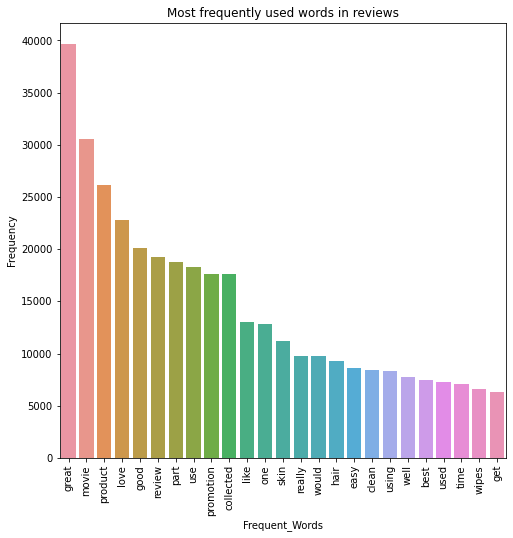

In [19]:
#plotting the most frequently used words in the reviews texts.
plt.figure(figsize=(8, 8))
plt.xticks(rotation=90)
plt.title("Most frequently used words in reviews")
sns.barplot(x="Frequent_Words", y="Frequency", data=word_frequency)

In [20]:
# preprocessing reviews text
lemmatizer_output = WordNetLemmatizer()

reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: word_tokenize(x.lower()) # converting the text to lower case
)
reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: [word for word in x if word not in STOPWORDS] #getting rid of stopwords
)
reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: [lemmatizer_output.lemmatize(word) for word in x] #lemmatizes the words in reviews text
)
reviews_df["full_review"] = reviews_df["full_review"].apply(lambda x: " ".join(x))

In [21]:
reviews_df['full_review'].head(15)

0     love fingerprint reader keyboard easy type fin...
1                    nice thin light type pretty easily
2     new love new design key spaced well mi type fi...
3     nice keyboard attached easily firmly nice feel...
4     nice improvement original keyboard okay laptop...
5     big improvement purchased replace original sur...
6     perfect type cover find comfortable type rarel...
7     good keyboard good keyboard addition surface p...
8     nice improvement tough getting work surface pr...
9     fingerprint scanner worth money now quickly ha...
10             must must accessory surface pro computer
11    worth price fingerprint scanner price worth go...
12    great keyboard great cover keyboard feel surpr...
13    keyboard smooth really fingerprint id make log...
14    pricey good product expensive easy setup plent...
Name: full_review, dtype: object

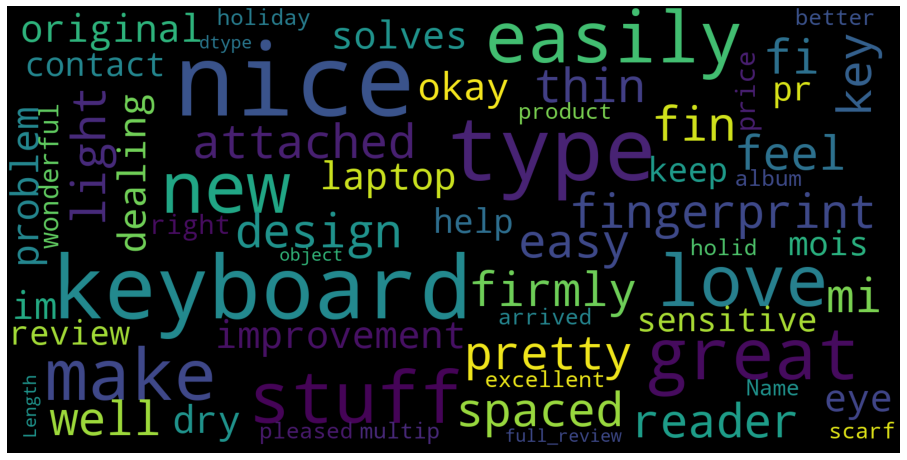

In [22]:
#plotting wordcloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)


def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color="black",
        stopwords=stopwords,
        max_words=250,
        max_font_size=45,
        scale=4,
        random_state=1,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=21)
        fig.subplots_adjust(top=2.1)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(reviews_df["full_review"])


### Resampling data

In [23]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [25]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

whole_text = reviews_df['full_review']
train_text = reviews_df['full_review']
y_ratings = reviews_df['reviews.rating']

In [26]:
#vectorizing the input reviews text
word_vec = TfidfVectorizer(sublinear_tf = True, strip_accents = 'unicode', analyzer = 'word', token_pattern = r'\w{1,}', stop_words = 'english', ngram_range = (1, 1), max_features=10000)
word_vec.fit(whole_text)
train_features = word_vec.transform(train_text)

In [27]:
train_features

<76909x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1251837 stored elements in Compressed Sparse Row format>

In [28]:
#Undersampling using nearmiss

nm = NearMiss()
X_undersample, y_undersample = nm.fit_resample(train_features, y_ratings)

In [29]:
#Oversampling using SMOTE

smote = SMOTE(random_state=42)
X_oversample, y_oversample= smote.fit_resample(train_features, y_ratings)

In [30]:
print('Original dataset shape %s' % Counter(y_ratings))
print('Undersampled dataset shape %s' % Counter(y_undersample))
print('Oversampled dataset shape %s' % Counter(y_oversample))

Original dataset shape Counter({5.0: 50041, 4.0: 16101, 3.0: 4743, 1.0: 3990, 2.0: 2034})
Undersampled dataset shape Counter({1.0: 2034, 2.0: 2034, 3.0: 2034, 4.0: 2034, 5.0: 2034})
Oversampled dataset shape Counter({5.0: 50041, 4.0: 50041, 3.0: 50041, 2.0: 50041, 1.0: 50041})


In [31]:
#creating train and test splits for undersampled, oversampled and original data
from sklearn.model_selection import train_test_split
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(train_features, y_ratings, test_size=0.3, random_state=101)
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversample, y_oversample, test_size=0.3, random_state=101)

### Implementing the random forest classifier and evaluating

In [32]:
#training RandomForestClassifier using undersampled data
from sklearn.ensemble import RandomForestClassifier

rfc_us = RandomForestClassifier()
rfc_us.fit(X_train_us,y_train_us)
rfc_pred_us = rfc_us.predict(X_test_us)
print(rfc_pred_us)
rfc_us.score(X_train_us, y_train_us)

[5. 1. 1. ... 1. 3. 2.]


0.9969096783256075

In [33]:
#training RandomForestClassifier using original data
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(rfc_pred)
rfc.score(X_train, y_train)

[5. 3. 5. ... 5. 5. 5.]


0.9992012779552716

In [34]:
#training RandomForestClassifier using oversampled data
rfc_os = RandomForestClassifier()
rfc_os.fit(X_train_os,y_train_os)
rfc_pred_os = rfc_os.predict(X_test_os)
print(rfc_pred_os)
rfc_os.score(X_train_os, y_train_os)

[2. 5. 4. ... 4. 5. 1.]


0.9997373574736073

In [35]:
print("Training accuracy score on undersampled data: ", rfc_us.score(X_train_us, y_train_us))
print("Training accuracy score on original data: ", rfc.score(X_train, y_train))
print("Training accuracy score on oversampled data: ", rfc_os.score(X_train_os, y_train_os))

Training accuracy score on undersampled data:  0.9969096783256075
Training accuracy score on original data:  0.9992012779552716
Training accuracy score on oversampled data:  0.9997373574736073


To ensure that there is enough  data for building a good model, I applied resampling techniques. 

The training accuracy score for the models is close to a hundred percent. This implies that the error for the models on training is close to zero. This ensures that the model is learned properly. 

In [36]:
# saving the models to use them for any further testing
filename = '/content/drive/MyDrive/CMPE_257_Project/randomforestclassifier_undersampled.sav'
pickle.dump(rfc_us, open(filename, 'wb'))
filename = '/content/drive/MyDrive/CMPE_257_Project/randomforestclassifier.sav'
pickle.dump(rfc, open(filename, 'wb'))
filename = '/content/drive/MyDrive/CMPE_257_Project/randomforestclassifier_oversampled.sav'
pickle.dump(rfc_os, open(filename, 'wb'))

In [37]:
#getting f1 score metrics
from sklearn.metrics import classification_report
print("Classification report for Undersampled data.")
print(classification_report(y_test_us, rfc_pred_us, labels=[1, 2, 3, 4, 5]))
print("\nClassification report for Original (no resampling) data.")
print(classification_report(y_test, rfc_pred, labels=[1, 2, 3, 4, 5]))
print("\nClassification report for Oversampled data.")
print(classification_report(y_test_os, rfc_pred_os, labels=[1, 2, 3, 4, 5]))

Classification report for Undersampled data.
              precision    recall  f1-score   support

           1       0.73      0.78      0.75       608
           2       0.60      0.59      0.59       589
           3       0.58      0.52      0.55       621
           4       0.52      0.38      0.44       638
           5       0.58      0.77      0.66       595

    accuracy                           0.61      3051
   macro avg       0.60      0.61      0.60      3051
weighted avg       0.60      0.61      0.60      3051


Classification report for Original (no resampling) data.
              precision    recall  f1-score   support

           1       0.81      0.60      0.69      1191
           2       0.93      0.14      0.24       630
           3       0.70      0.21      0.32      1413
           4       0.64      0.19      0.29      4873
           5       0.72      0.98      0.83     14966

    accuracy                           0.72     23073
   macro avg       0.76     

Though the training accuracy scores were good on undersampled, original and oversampled data. When evaluating on test data, the f1 scores varied a lot.

On oversampled data, the f1 score is significantly better. 

The testing accuracy or f1 score is close to a hundred. This implies that the error for out of training data is close to zero. This ensures that the errors for insample and out of sample data are similar, close to zero and the model is learned properly. 

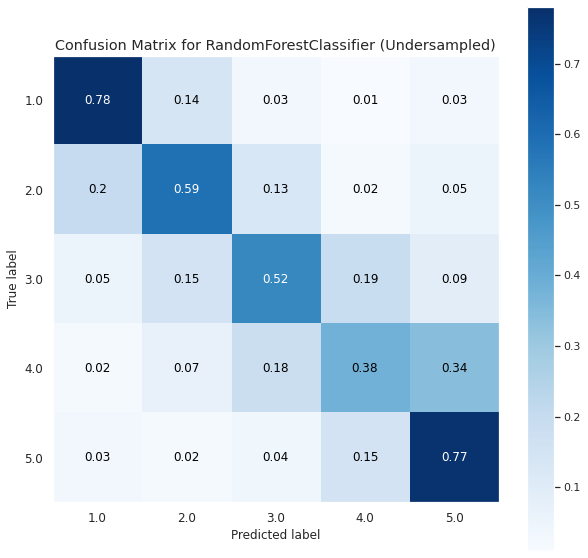

In [38]:
#plotting confusion matrix
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_confusion_matrix(y_test_us, rfc_pred_us, normalize=True, title = 'Confusion Matrix for RandomForestClassifier (Undersampled)')
plt.show()

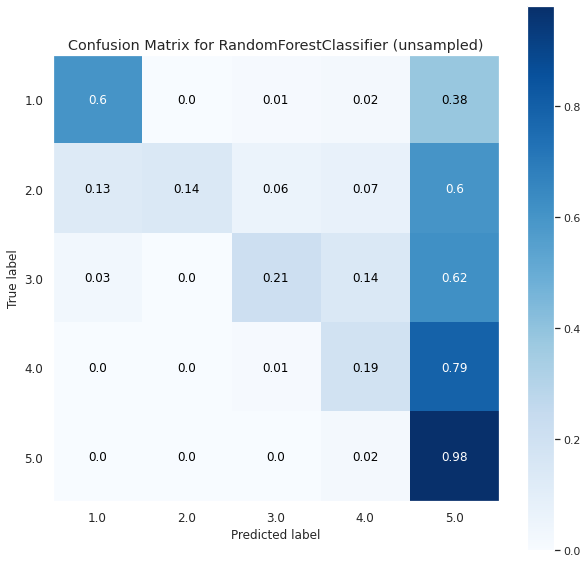

In [39]:
#plotting confusion matrix
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_confusion_matrix(y_test, rfc_pred, normalize=True, title = 'Confusion Matrix for RandomForestClassifier (unsampled)')
plt.show()

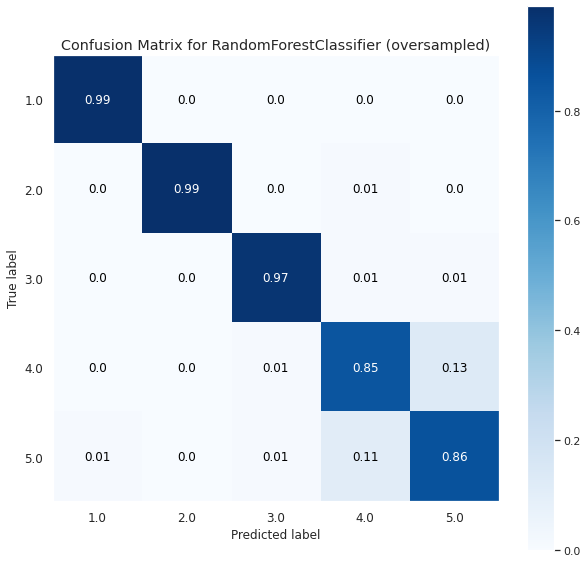

In [40]:
#plotting confusion matrix
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_confusion_matrix(y_test_os, rfc_pred_os, normalize=True, title = 'Confusion Matrix for RandomForestClassifier (oversampled)')
plt.show()

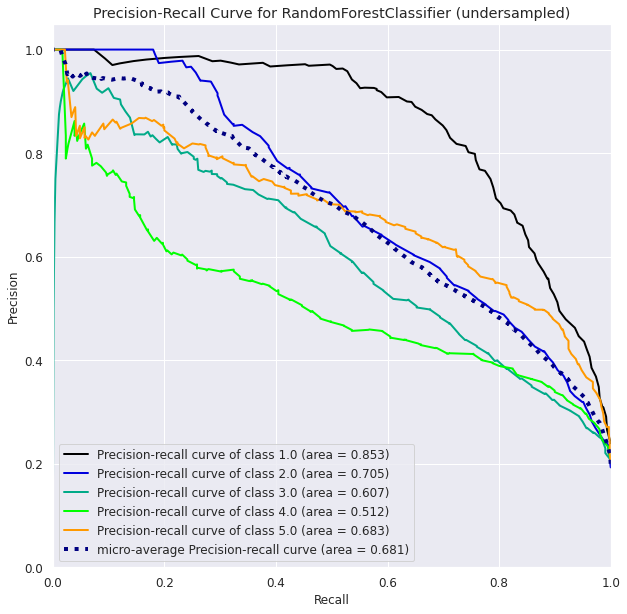

In [49]:
#plotting the precision recall curve for undersampled data
probas = rfc_us.predict_proba(X_test_us)
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_precision_recall_curve(y_test_us, probas, title = 'Precision-Recall Curve for RandomForestClassifier (undersampled)')
plt.show()

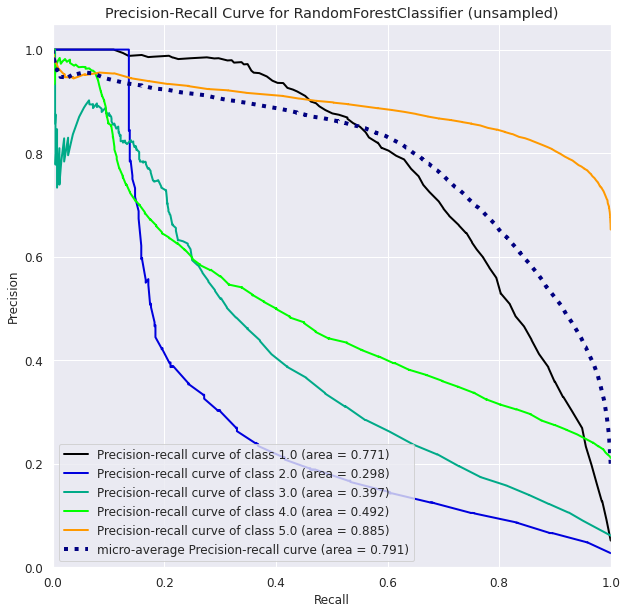

In [50]:
#plotting the precision recall curve for unsampled data
probas2 = rfc.predict_proba(X_test)
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_precision_recall_curve(y_test, probas2, title = 'Precision-Recall Curve for RandomForestClassifier (unsampled)')
plt.show()

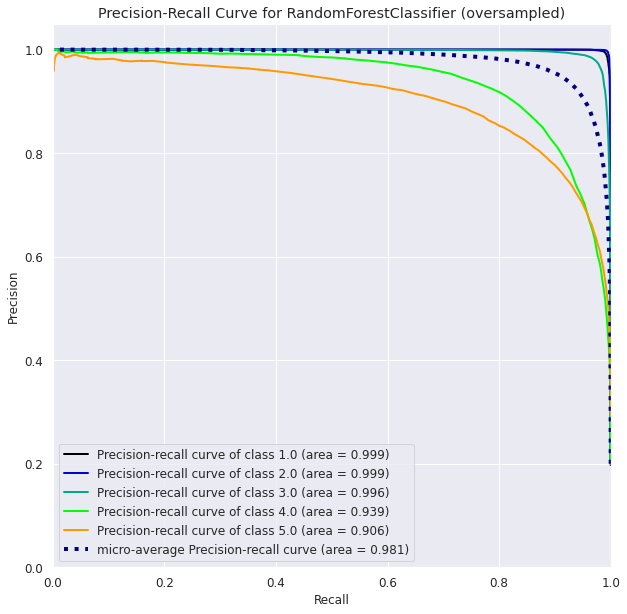

In [51]:
#plotting the precision recall curve for oversampled data
probas3 = rfc_os.predict_proba(X_test_os)
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_precision_recall_curve(y_test_os, probas3, title = 'Precision-Recall Curve for RandomForestClassifier (oversampled)')
plt.show()

The precision-recall on each class label for randomforest classifier on oversampled data is much more consistent and higher than the other versions of the classifier.

In [45]:
# calculating the log loss (since we have dealt with imbalanced multiclass data, log loss is a good choice)
from sklearn.metrics import log_loss
probas_us = rfc_us.predict_proba(X_test_us)
probas_ = rfc.predict_proba(X_test)
print("Log loss for undersampled data on RandomForestClassifier")
print(log_loss(y_test_us, probas_us))
print("\nLog loss for original (no resampling) data on RandomForestClassifier")
print(log_loss(y_test, probas_))
print("\nLog loss for oversampled data on RandomForestClassifier")
print(log_loss(y_test_os, probas3))

Log loss for undersampled data on RandomForestClassifier
1.027173796396512

Log loss for original (no resampling) data on RandomForestClassifier
0.8188456906593835

Log loss for oversampled data on RandomForestClassifier
0.32356561698480707


The loss for randomforestclassifier on oversampled data is a lot less comparitively, implying that the model on the oversampled data is trained well.  

### Custom test cases

In [46]:
# giving some custom test inputs to evaluate the model
custom_test_inputs = ["so satisfied with the purchase good product works well", "this device feels ok it works fine", "really disappointed with the purchase defective product not working", "used to be good but since the change the worst product ever", "used to be bad but from when it was updated it is the best product ever"]
inputs_vec = word_vec.transform(custom_test_inputs)

In [47]:
# testing on rfc_os model (randomforestclassifier model that was trained on the oversampled data.)
custom_preds = rfc_os.predict(inputs_vec)
for index in range(len(custom_test_inputs)):
  print("The rating predicted for the review - \"", custom_test_inputs[index], "\" is : ", custom_preds[index])


The rating predicted for the review - " so satisfied with the purchase good product works well " is :  4.0
The rating predicted for the review - " this device feels ok it works fine " is :  3.0
The rating predicted for the review - " really disappointed with the purchase defective product not working " is :  1.0
The rating predicted for the review - " used to be good but since the change the worst product ever " is :  1.0
The rating predicted for the review - " used to be bad but from when it was updated it is the best product ever " is :  5.0


The rating predictions on this version of the model (on oversampled data) are pretty good/accurate. 

In [48]:
# testing on rfc model (randomforestclassifier model that was trained on the original data.)
custom_preds = rfc.predict(inputs_vec)
for index in range(len(custom_test_inputs)):
  print("The rating predicted for the review - \"", custom_test_inputs[index], "\" is : ", custom_preds[index])


The rating predicted for the review - " so satisfied with the purchase good product works well " is :  5.0
The rating predicted for the review - " this device feels ok it works fine " is :  3.0
The rating predicted for the review - " really disappointed with the purchase defective product not working " is :  1.0
The rating predicted for the review - " used to be good but since the change the worst product ever " is :  5.0
The rating predicted for the review - " used to be bad but from when it was updated it is the best product ever " is :  5.0


The rating predictions for this version of the model (on unsampled data) are not up to the mark.